In [3]:
from helpers import *
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, ConnectionStyle
from mpl_toolkits.mplot3d import Axes3D

## demo from [matplotlib](https://matplotlib.org/stable/gallery/userdemo/connectionstyle_demo.html)


In [50]:

def demo_con_style(ax, connectionstyle):
    # x1, y1 = 0.2, 0.2
    # x2, y2 = 0.8, 0.6
    x1, y1 = 0,1
    x2, y2 = 0,-1

    ax.plot([x1, x2], [y1, y2], ".")
    ax.annotate("",
                xy=(x1, y1), xycoords='data',
                xytext=(x2, y2), textcoords='data',
                arrowprops=dict(arrowstyle="->", color="0.5",
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle=connectionstyle,
                                ),
                )

    ax.text(.05, .95, connectionstyle.replace(",", ",\n"),
            transform=ax.transAxes, ha="left", va="top")

In [39]:
def radian_calc(frac):
    return frac * 2* math.pi

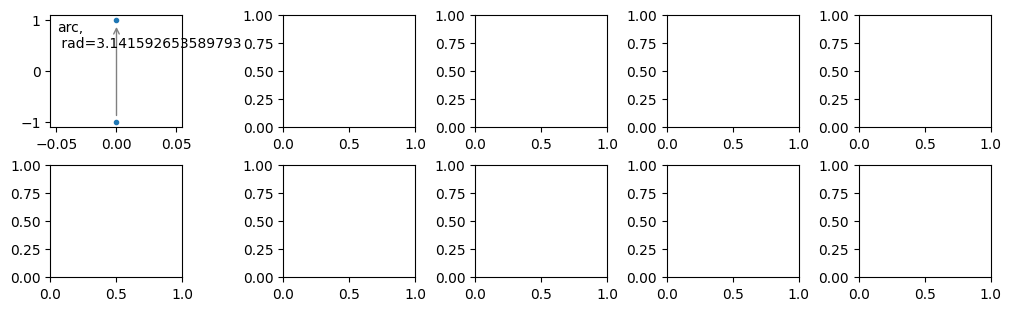

In [53]:
fig, axs = plt.subplots(2, 5, figsize=(10,3), layout="constrained")

# represent a or b in the same way 
demo_con_style(axs[0, 0], f"arc, rad={radian_calc(0.5)}")
# demo_con_style(axs[1, 0], f"arc3, rad={radian_calc(0.)}")

# demo_con_style(axs[0,1], f"arc3, rad={radian_calc(0.01)}")

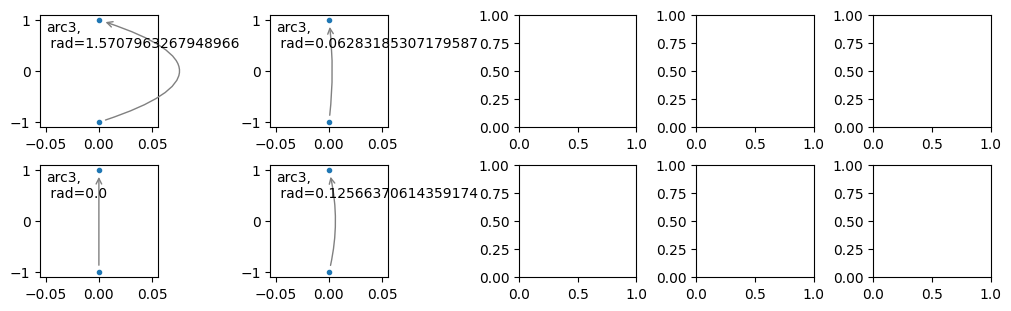

In [54]:
fig, axs = plt.subplots(2, 5, figsize=(10,3), layout="constrained")

# represent a or b in the same way 
demo_con_style(axs[0, 0], f"arc3, rad={radian_calc(0.5)/2}")
demo_con_style(axs[1, 0], f"arc3, rad={radian_calc(0.)}")

demo_con_style(axs[0,1], f"arc3, rad={radian_calc(0.01)}")
demo_con_style(axs[1,1], f"arc3, rad={radian_calc(0.02)}")



# demo_con_style(axs[0, 2], "angle,angleA=280,angleB=190")
# demo_con_style(axs[1, 2], "angle,angleA=-80,angleB=10")

# demo_con_style(axs[0, 3], "angle,angleA=260,angleB=190")
# demo_con_style(axs[1, 3], "angle,angleA=-100,angleB=10")


# # a then b 
# demo_con_style(axs[0, 4], "angle,angleA=225,angleB=180")
# demo_con_style(axs[1, 4], "angle,angleA=225,angleB=70")
# demo_con_style(axs[1, 3], "angle,angleA=-100,angleB=10")

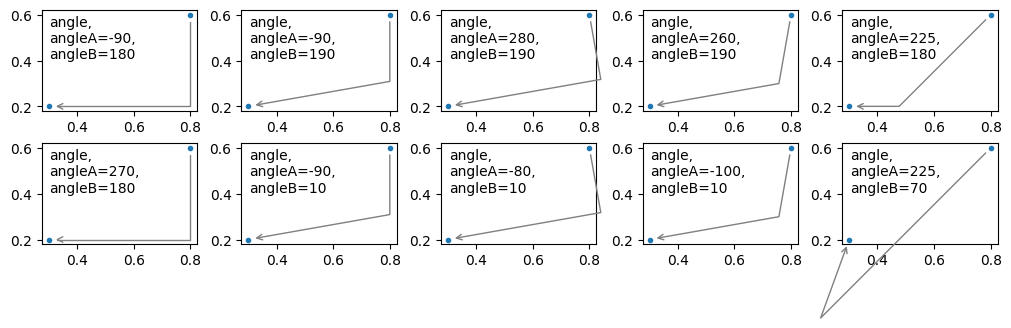

In [32]:
fig, axs = plt.subplots(2, 5, figsize=(10,3), layout="constrained")

# represent a or b in the same way 
demo_con_style(axs[0, 0], "angle,angleA=-90,angleB=180")
demo_con_style(axs[1, 0], "angle,angleA=270,angleB=180")


demo_con_style(axs[0, 1], "angle,angleA=-90,angleB=190")
demo_con_style(axs[1, 1], "angle,angleA=-90,angleB=10")

demo_con_style(axs[0, 2], "angle,angleA=280,angleB=190")
demo_con_style(axs[1, 2], "angle,angleA=-80,angleB=10")

demo_con_style(axs[0, 3], "angle,angleA=260,angleB=190")
demo_con_style(axs[1, 3], "angle,angleA=-100,angleB=10")


# a then b 
demo_con_style(axs[0, 4], "angle,angleA=225,angleB=180")
demo_con_style(axs[1, 4], "angle,angleA=225,angleB=70")
# demo_con_style(axs[1, 3], "angle,angleA=-100,angleB=10")

## testing angle between vectors

In [2]:
# plot two vectors, calculate slope between
# then see if can get angle to match .. 

vec1 = ((0,0), (1,4))
vec2 = ((0,0), (4,2))

vec1_curve = FancyArrowPatch(posA=vec1[0], posB=vec1[1], color="red")
vec2_curve = FancyArrowPatch(posA=vec2[0], posB=vec2[1], color="green")

In [3]:
def angle_between_vectors(v, w):
    dot_product = np.dot(v, w)
    v_magnitude = np.linalg.norm(v)
    w_magnitude = np.linalg.norm(w)
    cos_theta = dot_product / (v_magnitude * w_magnitude)
    angle_radians = np.arccos(np.clip(cos_theta, -1.0, 1.0))
    angle_degrees = np.degrees(angle_radians)
    return angle_degrees, angle_radians

In [4]:
deg, rad = angle_between_vectors(np.array(vec1[1]), np.array(vec2[1]))
deg, rad

(49.398705354995535, 0.8621700546672264)

In [5]:
c = ConnectionStyle("arc3,rad=0.3")
c.rad

0.3

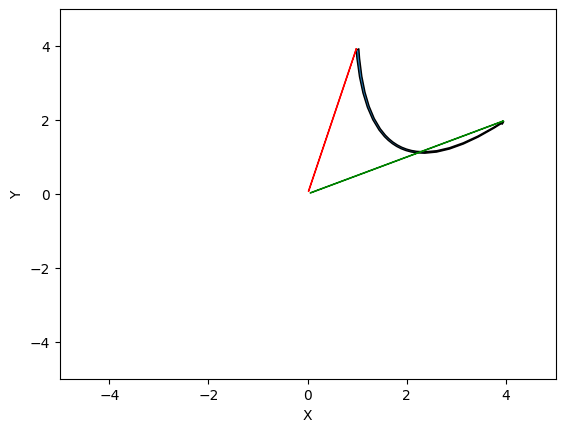

In [6]:


# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111)

# Define the start and end points of the curve
x_start, y_start  = vec1[1]
x_end, y_end = vec2[1]


# c = ConnectionStyle("Angle3", angleA=90, angleB=70)



# Create a FancycurvePatch object
curve = FancyArrowPatch((x_start, y_start), (x_end, y_end), arrowstyle='fancy', mutation_scale=5, connectionstyle=f"arc3,rad={rad}")

# Add the curve to the plot
ax.add_patch(curve)
ax.add_patch(vec1_curve)
ax.add_patch(vec2_curve)

# Set plot limits
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])


# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()

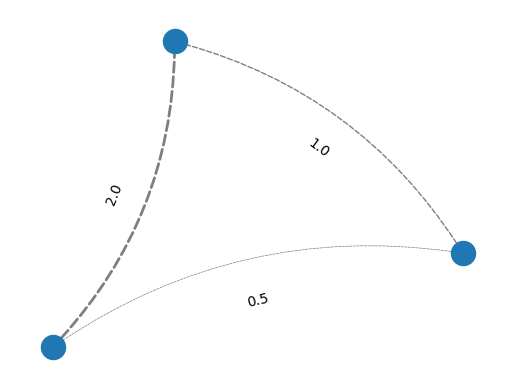

In [7]:
# Create a graph
G = nx.Graph()

# Add nodes
G.add_nodes_from([1, 2, 3])

# Add edges with weight attribute
G.add_edge(1, 2, weight=0.5)
G.add_edge(2, 3, weight=2.0)
G.add_edge(1, 3, weight=1.0)

# Create a layout for our nodes
pos = nx.spring_layout(G)

# Draw the nodes
nx.draw_networkx_nodes(G, pos)

# Draw curved edges
edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]
nx.draw_networkx_edges(G, pos, edgelist=edges, width=weights, edge_color='k', style='dashed', alpha=0.5, connectionstyle="arc3,rad=0.2", arrows=True)

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Display the graph
plt.axis('off')
plt.show()